### Ready to code?


http://floatingmedia.com/columbia/BBC.html




In [52]:
##Import your libraries: Beautiful soup, requests, and re (For regular expressions)
from bs4 import BeautifulSoup
import requests
import pandas as pd

import time
import re

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

from webdriver_manager.chrome import ChromeDriverManager


In [53]:
df = pd.read_csv('bbc_movie_2.csv')
df.head()

,movie,director,m_year,crit_rank,critic,crit_org,crit_cn
0,Mulholland Drive,David Lynch,2001,1,Simon Abrams,Freelance film critic,US
1,In the Mood for Love,Wong Kar-wai,2000,2,Simon Abrams,Freelance film critic,US
2,The Tree of Life,Terrence Malick,2011,3,Simon Abrams,Freelance film critic,US
3,Yi Yi: A One and a Two,Edward Yang,2000,4,Simon Abrams,Freelance film critic,US
4,Goodbye to Language,Jean-Luc Godard,2014,5,Simon Abrams,Freelance film critic,US


In [54]:
# Which movie chose by critic most frequesntly?

df.movie.value_counts().head(10)

#there are 598 movies in rankings
# "In the Mood for Love" is chosen most

In the Mood for Love                     49
Mulholland Drive                         47
There Will Be Blood                      35
Spirited Away                            34
Boyhood                                  30
Eternal Sunshine of the Spotless Mind    29
A Separation                             28
The Tree of Life                         23
Yi Yi: A One and a Two                   22
No Country For Old Men                   21
Name: movie, dtype: int64

In [ ]:
# 4 out of 10 movies here are NON English movie!!
# But I asuume that many, many movies in the world were in English...

In [42]:
# Question: What kind of languages used in movies in the BBC database?? Is English dominant? 

In [59]:
from tqdm.auto import tqdm
m_list = df.movie.tolist()
movie_link = []
for movie in tqdm(m_list):
    string = movie.replace(" ","+")
    hrefs = "https://www.imdb.com/find?q=" + string
    raw_html = requests.get(hrefs).content
    soup_doc = BeautifulSoup(raw_html, "html.parser")
    headers = soup_doc.find_all('h3')
    for head in headers:
        if (re.search("Titles", head.text)):
            td_result = head.parent.find(class_ = "result_text")
            m_info ={}
            m_info['name'] = movie
            m_info['link']  = td_result.a["href"]
            movie_link.append(m_info)
        else:
            movie
movie_link    


  0%|          | 0/1770 [00:00<?, ?it/s]

[{'name': 'Mulholland Drive', 'link': '/title/tt0166924/'},
 {'name': 'In the Mood for Love', 'link': '/title/tt0118694/'},
 {'name': 'The Tree of Life', 'link': '/title/tt0478304/'},
 {'name': 'Yi Yi: A One and a Two', 'link': '/title/tt0244316/'},
 {'name': 'Goodbye to Language', 'link': '/title/tt2400275/'},
 {'name': 'The White Meadows', 'link': '/title/tt1509132/'},
 {'name': 'Night Across the Street', 'link': '/title/tt1876360/'},
 {'name': 'Certified Copy', 'link': '/title/tt1020773/'},
 {'name': 'Sparrow', 'link': '/title/tt0491044/'},
 {'name': 'Fados', 'link': '/title/tt1056422/'},
 {'name': 'In the Mood for Love', 'link': '/title/tt0118694/'},
 {'name': 'Eternal Sunshine of the Spotless Mind',
  'link': '/title/tt0338013/'},
 {'name': 'Syndromes and a Century', 'link': '/title/tt0477731/'},
 {'name': 'Spirited Away', 'link': '/title/tt0245429/'},
 {'name': 'The Act of Killing', 'link': '/title/tt2375605/'},
 {'name': 'The Grand Budapest Hotel', 'link': '/title/tt2278388/'},


In [98]:
movie_df = pd.DataFrame(movie_link)
movie_df.to_csv('bbc_movie_link.csv', index =False)



,name,link
0,Mulholland Drive,/title/tt0166924/
1,In the Mood for Love,/title/tt0118694/
2,The Tree of Life,/title/tt0478304/
3,Yi Yi: A One and a Two,/title/tt0244316/
4,Goodbye to Language,/title/tt2400275/
...,...,...
1759,The Lives of Others,/title/tt0405094/
1760,Still Life,/title/tt2395417/
1761,Birdman,/title/tt2562232/
1762,Infernal Affairs,/title/tt0338564/


In [60]:
movie_df = pd.read_csv('bbc_movie_link.csv')
movie_df

,name,link
0,Mulholland Drive,/title/tt0166924/
1,In the Mood for Love,/title/tt0118694/
2,The Tree of Life,/title/tt0478304/
3,Yi Yi: A One and a Two,/title/tt0244316/
4,Goodbye to Language,/title/tt2400275/
...,...,...
1759,The Lives of Others,/title/tt0405094/
1760,Still Life,/title/tt2395417/
1761,Birdman,/title/tt2562232/
1762,Infernal Affairs,/title/tt0338564/


In [66]:
#find language data


links = movie_df.link.tolist()
m_language = []
for name in tqdm(links):
    url = "https://www.imdb.com" + name
    raw_html = requests.get(url).content
    doc = BeautifulSoup(raw_html, "html.parser")
    headers = doc.find_all(class_="ipc-metadata-list-item__label")
    for head in headers:
        if (re.search("Language", head.text)):
            try:
                
                dict ={}
                a_result = head.parent.find(class_ = "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")
                dict['link'] = name
                dict['dominamt_lang'] = a_result.text
                m_language.append(dict)
                print(a_result.text)
            except Exception:
                m_language.append("NaN")
                print("NaN")
                pass

            


  0%|          | 0/1764 [00:00<?, ?it/s]

English
Cantonese
English
Mandarin
French
Persian
Spanish
French
Cantonese
Portuguese
Cantonese
English
Thai
Japanese
Indonesian
English
English
French
Mandarin
English
English
English
English
English
English
English
English
English
English
English
Cantonese
English
English
Spanish
French
English
Romanian
French
German
English
French
English
English
Romanian
French
English
French
English
English
Spanish
English
Japanese
Persian
Spanish
English
Mandarin
English
English
English
English
Italian
Italian
None
Italian
Italian
Italian
Italian
English
Italian
English
English
English
English
English
English
English
English
English
English
English
English
English
English
Turkish
English
English
English
English
Cantonese
French
Thai
Cantonese
English
Spanish
French
English
English
Portuguese
English
English
English
English
Portuguese
Spanish
English
English
English
English
English
Cantonese
English
Japanese
English
French
Spanish
French
English
German
Spanish
English
English
English
English
Engli

English
Mandarin
German
English
Japanese
French
Romanian
English
Russian
Persian
Spanish
French
English
French
Cantonese
None
French
English
Portuguese
French
English
English
English
Japanese
English
English
Italian
English
Spanish
English
English
English
English
English
English
English
English
English
English
English
English
French
French
French
Portuguese
Italian
English
Japanese
English
English
English
Chinese
French
Portuguese
English
English
English
English
English
English
English
English
English
English
English
French
English
Japanese
Hungarian
English
English
English
English
English
English
English
French
German
Spanish
English
English
English
English
English
English
English
English
English
English
English
Mandarin
Persian
English
Romanian
English
German
English
French
Persian
French
English
English
English
English
English
Chinese
English
English
English
English
German
English
English
Spanish
English
German
English
English
Spanish
English
English
English
English
English
English


In [67]:
len(m_language)

1754

In [68]:
lang_df = pd.DataFrame(m_language)


In [69]:
lang_df.to_csv('lang_list.csv', index = False)


In [70]:
lang_df = pd.read_csv('lang_list.csv')
lang_df

,link,dominamt_lang
0,/title/tt0166924/,English
1,/title/tt0118694/,Cantonese
2,/title/tt0478304/,English
3,/title/tt0244316/,Mandarin
4,/title/tt2400275/,French
...,...,...
1749,/title/tt0405094/,German
1750,/title/tt2395417/,English
1751,/title/tt2562232/,English
1752,/title/tt0338564/,Cantonese


In [71]:
movie_df

,name,link
0,Mulholland Drive,/title/tt0166924/
1,In the Mood for Love,/title/tt0118694/
2,The Tree of Life,/title/tt0478304/
3,Yi Yi: A One and a Two,/title/tt0244316/
4,Goodbye to Language,/title/tt2400275/
...,...,...
1759,The Lives of Others,/title/tt0405094/
1760,Still Life,/title/tt2395417/
1761,Birdman,/title/tt2562232/
1762,Infernal Affairs,/title/tt0338564/


In [72]:
len(movie_df.name.unique())
# the number of movie names in movie_df are 592

592

In [73]:
# merge movie_df AND lang_df based on 'link' column
movie_lang_df = pd.merge(movie_df, lang_df, how='left', on='link').drop_duplicates().reset_index(drop=True)
movie_lang_df = movie_lang_df.rename(columns={'name': 'movie'})
movie_lang_df = movie_lang_df.rename(columns={'dominamt_lang': 'dominant_lang'})

movie_lang_df

,movie,link,dominant_lang
0,Mulholland Drive,/title/tt0166924/,English
1,In the Mood for Love,/title/tt0118694/,Cantonese
2,The Tree of Life,/title/tt0478304/,English
3,Yi Yi: A One and a Two,/title/tt0244316/,Mandarin
4,Goodbye to Language,/title/tt2400275/,French
...,...,...,...
587,I Don't Want to Sleep Alone,/title/tt0855824/,Min Nan
588,Kings and Queen,/title/tt0344273/,French
589,The Hours,/title/tt0274558/,English
590,The Sun Also Rises,/title/tt0051028/,English


In [74]:
movie_lang_df.dominant_lang.value_counts(normalize = True)*100
# more than 54% of movies in the ranking are in English

English       54.965753
French         9.760274
Spanish        4.109589
Japanese       2.739726
Italian        2.568493
German         2.397260
Mandarin       2.054795
Korean         1.883562
Portuguese     1.883562
Arabic         1.883562
Hindi          1.712329
Russian        1.369863
Persian        1.369863
None           1.198630
Hebrew         1.198630
Cantonese      1.027397
Swedish        1.027397
Turkish        0.856164
Thai           0.684932
Romanian       0.684932
Filipino       0.513699
Hungarian      0.513699
Indonesian     0.342466
Nepali         0.171233
Czech          0.171233
Finnish        0.171233
Low German     0.171233
Kurdish        0.171233
Tamil          0.171233
Marathi        0.171233
Catalan        0.171233
Maya           0.171233
Kannada        0.171233
Polish         0.171233
Greek          0.171233
Swahili        0.171233
Danish         0.171233
Chinese        0.171233
Malay          0.171233
Malayalam      0.171233
Bambara        0.171233
Min Nan        0

In [75]:
original_df = pd.read_csv('bbc_movie_2.csv')
original_df

,movie,director,m_year,crit_rank,critic,crit_org,crit_cn
0,Mulholland Drive,David Lynch,2001,1,Simon Abrams,Freelance film critic,US
1,In the Mood for Love,Wong Kar-wai,2000,2,Simon Abrams,Freelance film critic,US
2,The Tree of Life,Terrence Malick,2011,3,Simon Abrams,Freelance film critic,US
3,Yi Yi: A One and a Two,Edward Yang,2000,4,Simon Abrams,Freelance film critic,US
4,Goodbye to Language,Jean-Luc Godard,2014,5,Simon Abrams,Freelance film critic,US
...,...,...,...,...,...,...,...
1765,The Lives of Others,Florian Henckel von Donnersmarck,2006,6,Raymond Zhou,China Daily,China
1766,Still Life,Jia Zhangke,2006,7,Raymond Zhou,China Daily,China
1767,Birdman,Alejandro González Iñárritu,2014,8,Raymond Zhou,China Daily,China
1768,Infernal Affairs,Andrew Lau and Alan Mak,2002,9,Raymond Zhou,China Daily,China


In [76]:
# merge movie_lang_df with original_df
original_lang = pd.merge(original_df, movie_lang_df, how='left', on='movie').drop_duplicates().reset_index(drop=True)
original_lang

,movie,director,m_year,crit_rank,critic,crit_org,crit_cn,link,dominant_lang
0,Mulholland Drive,David Lynch,2001,1,Simon Abrams,Freelance film critic,US,/title/tt0166924/,English
1,In the Mood for Love,Wong Kar-wai,2000,2,Simon Abrams,Freelance film critic,US,/title/tt0118694/,Cantonese
2,The Tree of Life,Terrence Malick,2011,3,Simon Abrams,Freelance film critic,US,/title/tt0478304/,English
3,Yi Yi: A One and a Two,Edward Yang,2000,4,Simon Abrams,Freelance film critic,US,/title/tt0244316/,Mandarin
4,Goodbye to Language,Jean-Luc Godard,2014,5,Simon Abrams,Freelance film critic,US,/title/tt2400275/,French
...,...,...,...,...,...,...,...,...,...
1765,The Lives of Others,Florian Henckel von Donnersmarck,2006,6,Raymond Zhou,China Daily,China,/title/tt0405094/,German
1766,Still Life,Jia Zhangke,2006,7,Raymond Zhou,China Daily,China,/title/tt2395417/,English
1767,Birdman,Alejandro González Iñárritu,2014,8,Raymond Zhou,China Daily,China,/title/tt2562232/,English
1768,Infernal Affairs,Andrew Lau and Alan Mak,2002,9,Raymond Zhou,China Daily,China,/title/tt0338564/,Cantonese


In [77]:
# save
original_lang.to_csv('bbc_movie_lang.csv', index = False)


In [78]:
original_lang = pd.read_csv('bbc_movie_lang.csv')

<AxesSubplot:>

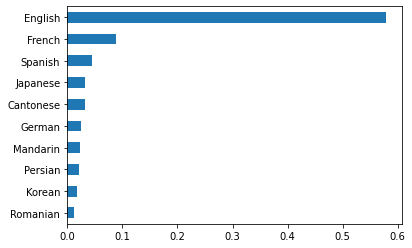

In [51]:
#see language percentage
original_lang = pd.read_csv('bbc_movie_lang.csv')
original_lang.dominant_lang.value_counts(normalize = True).head(10).sort_values().plot(kind = 'barh')


In [130]:
len(original_lang.critic.unique())
# thee number of critics in this data is 177

177

In [132]:
# see critic's country of origin
original_lang.groupby('crit_cn').crit_cn.value_counts().sort_values(ascending = False).head(10)/10/177*100
# 46 % of critics are from US, 10% are from UK

crit_cn    crit_cn  
US         US           46.327684
UK         UK           10.169492
Cuba       Cuba          2.824859
India      India         2.824859
Canada     Canada        2.824859
Germany    Germany       2.824859
France     France        2.824859
Australia  Australia     2.259887
Israel     Israel        2.259887
Italy      Italy         2.259887
Name: crit_cn, dtype: float64

<AxesSubplot:>

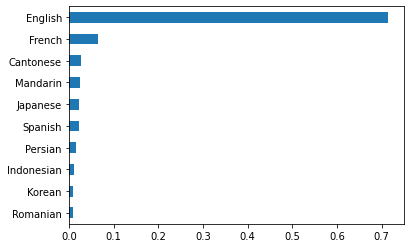

In [81]:
# movie chosen by US critics
us_df = original_lang[original_lang.crit_cn == "US"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')
us_df

<AxesSubplot:>

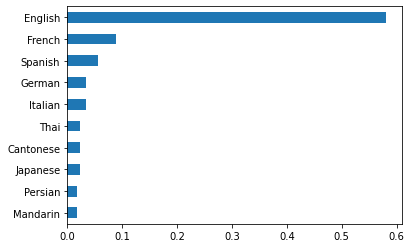

In [82]:
# movie chosen by UK critics
uk_df = original_lang[original_lang.crit_cn == "UK"]
uk_df.dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

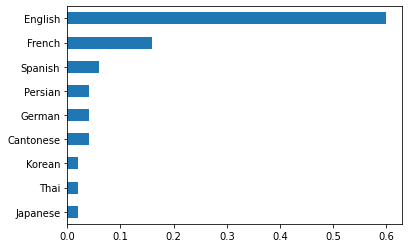

In [83]:
#Canada
ca_df = original_lang[original_lang.crit_cn == "Canada"]
ca_df.dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

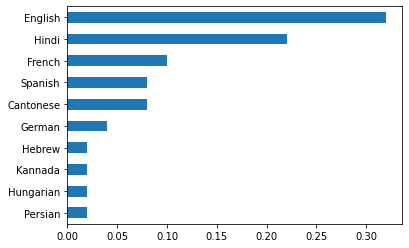

In [84]:
# India --diverse
Ind_df = original_lang[original_lang.crit_cn == "India"]
Ind_df.dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

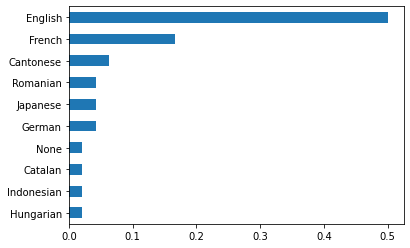

In [85]:
# Germany --like French movies
original_lang[original_lang.crit_cn == "Germany"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

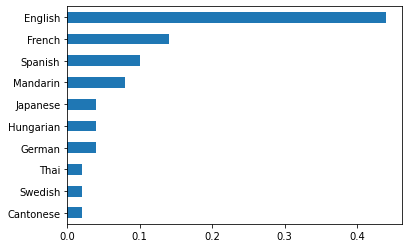

In [86]:
# France
fr_df = original_lang[original_lang.crit_cn == "France"]
fr_df.dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

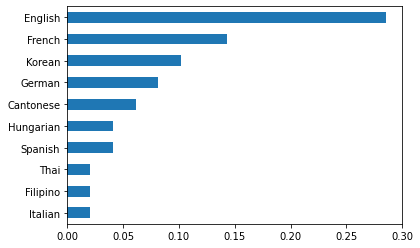

In [87]:
# Cuba --- not many Spanish movies selected! 
original_lang[original_lang.crit_cn == "Cuba"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

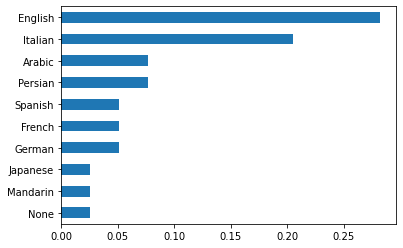

In [88]:
# Italy ---fewer English movies
original_lang[original_lang.crit_cn == "Italy"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

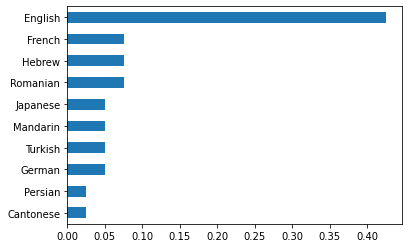

In [22]:
# Israel
original_lang[original_lang.crit_cn == "Israel"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

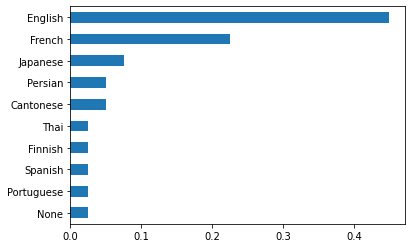

In [89]:
# Australia
original_lang[original_lang.crit_cn == "Australia"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

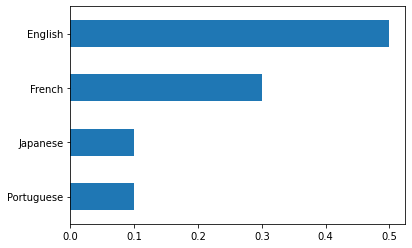

In [90]:
# What about the countries where people do use English and their first language are mostly non-Alohabetic languages?
# Japan -love French movies again
original_lang[original_lang.crit_cn == "Japan"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

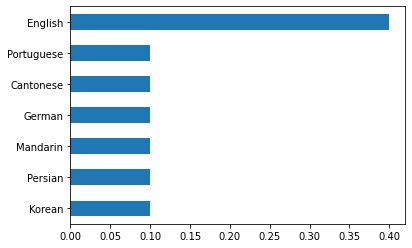

In [91]:
# China 
original_lang[original_lang.crit_cn == "China"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

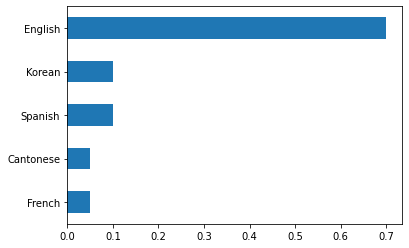

In [92]:
# Korea -- 
original_lang[original_lang.crit_cn == "South Korea"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

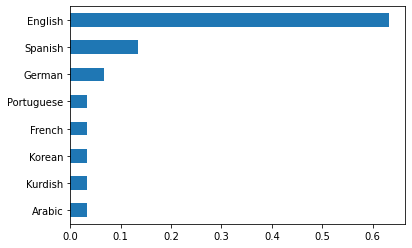

In [94]:
# UAE
original_lang[original_lang.crit_cn == "UAE"].dominant_lang.value_counts(normalize =True).head(10).sort_values().plot(kind = 'barh')

In [102]:
crit_cn_list = original_lang.crit_cn.unique().tolist()
for cn in crit_cn_list:
    xx = original_lang[original_lang.crit_cn == cn].dominant_lang.value_counts(normalize =True).head(1)
    print(cn, xx)
    print("---------")

US English    0.713933
Name: dominant_lang, dtype: float64
---------
Mexico English    0.5
Name: dominant_lang, dtype: float64
---------
UK English    0.581006
Name: dominant_lang, dtype: float64
---------
Italy English    0.282051
Name: dominant_lang, dtype: float64
---------
Turkey English    0.4
Name: dominant_lang, dtype: float64
---------
Brazil English    0.8
Name: dominant_lang, dtype: float64
---------
Canada English    0.6
Name: dominant_lang, dtype: float64
---------
Argentina English    0.55
Name: dominant_lang, dtype: float64
---------
France English    0.44
Name: dominant_lang, dtype: float64
---------
Germany English    0.5
Name: dominant_lang, dtype: float64
---------
India English    0.32
Name: dominant_lang, dtype: float64
---------
Israel English    0.425
Name: dominant_lang, dtype: float64
---------
Australia English    0.45
Name: dominant_lang, dtype: float64
---------
Cuba English    0.285714
Name: dominant_lang, dtype: float64
---------
Colombia English    0.4
Nam

<AxesSubplot:>

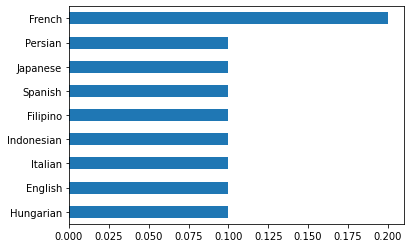

In [114]:
# Indonesia --Love French movies
original_lang[original_lang.crit_cn == "Indonesia"].dominant_lang.value_counts(normalize =True).sort_values().plot(kind = 'barh')

<AxesSubplot:>

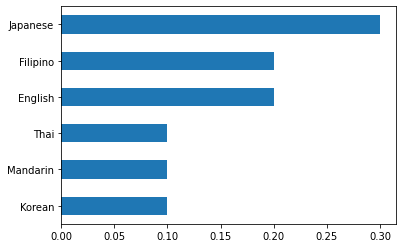

In [115]:
# Philippines --wait, Japanese movies??
original_lang[original_lang.crit_cn == "Philippines"].dominant_lang.value_counts(normalize =True).sort_values().plot(kind = 'barh')

<AxesSubplot:>

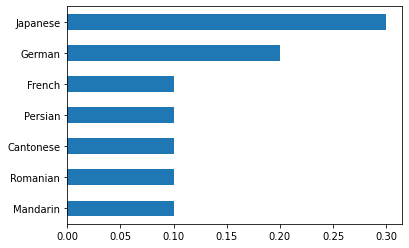

In [103]:
# Hong Kong --- Japanese and German ?!?!
original_lang[original_lang.crit_cn == "Hong Kong"].dominant_lang.value_counts(normalize =True).sort_values().plot(kind = 'barh')